<a href="https://colab.research.google.com/github/amannain122/projects/blob/main/DecisionTrees_vs_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importing Required Libraries and Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

##2. Ingesting and Understanding Data

In [ ]:
df = pd.read_csv("LoanTrain.csv")

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [ ]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


##3. Data Handling using Simple Imputer

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
mode_imp = SimpleImputer(strategy='most_frequent')
median_imp = SimpleImputer(strategy='median')
mode_cols = ['Gender', 'Married', 'Dependents', 'Credit_History', 'Self_Employed', 'Loan_Amount_Term']
median_cols = ['LoanAmount']

In [ ]:
mode_imp.fit(df[mode_cols])
df[mode_cols] = mode_imp.transform(df[mode_cols])

In [ ]:
median_imp.fit(df[median_cols])
df[median_cols] = median_imp.transform(df[median_cols])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

##4. Generating Dummies and Treating Outliers

Text(0, 0.5, 'Frequency')

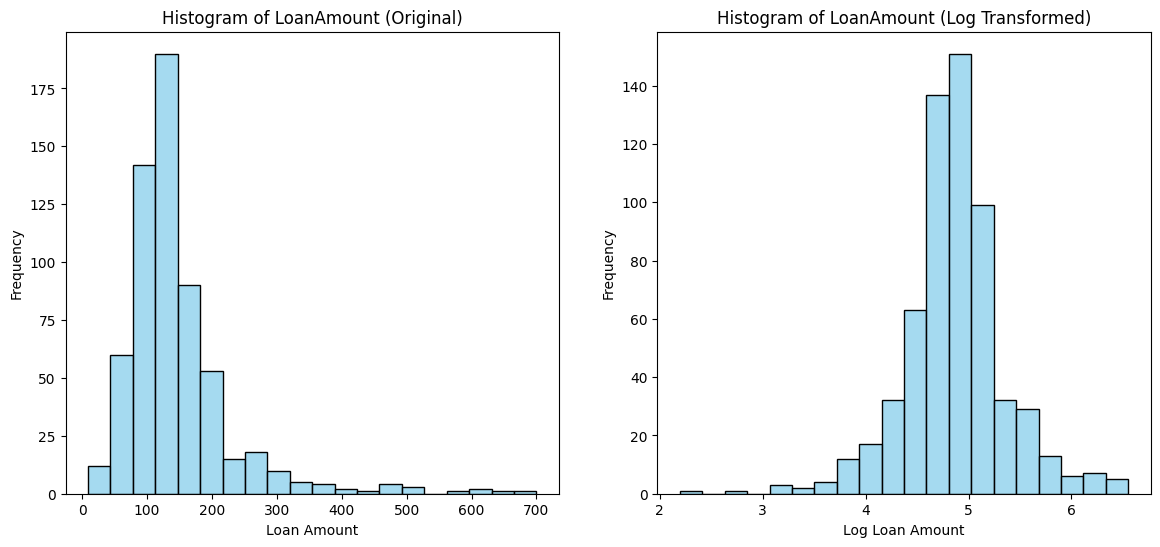

In [ ]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['LoanAmount'], bins=20, color='skyblue')
plt.title('Histogram of LoanAmount (Original)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['LoanAmount_log'], bins=20, color='skyblue')
plt.title('Histogram of LoanAmount (Log Transformed)')
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')

In [ ]:
df.drop(columns = ['Loan_ID'], inplace=True)

In [ ]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,1,0,0,0,0,5849,0.0,128.0,360,1,2,1,4.852030
1,1,1,1,0,0,4583,1508.0,128.0,360,1,0,0,4.852030
2,1,1,0,0,1,3000,0.0,66.0,360,1,2,1,4.189655
3,1,1,0,1,0,2583,2358.0,120.0,360,1,2,1,4.787492
4,1,0,0,0,0,6000,0.0,141.0,360,1,2,1,4.948760


##5. Feature Engineering

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [ ]:
df['LoanAmount'] = df['LoanAmount']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [ ]:
df['BalanceIncome'] = df['TotalIncome'] - df['EMI']

In [ ]:
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], inplace = True)

In [ ]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,BalanceIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.855049,1.037459,0.687296,4.857250,7024.705081,8.669414,0.473687,7024.231394
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.352339,0.787482,0.463973,0.495996,6458.663872,0.545102,0.511134,6458.477336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,1442.000000,7.273786,0.025000,1441.902778
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.607658,4166.000000,8.334712,0.288889,4165.765278
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.852030,5416.500000,8.597205,0.361111,5416.113889
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,5.104426,7521.750000,8.925549,0.505556,7519.018750
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.551080,81000.000000,11.302204,9.250000,80999.000000


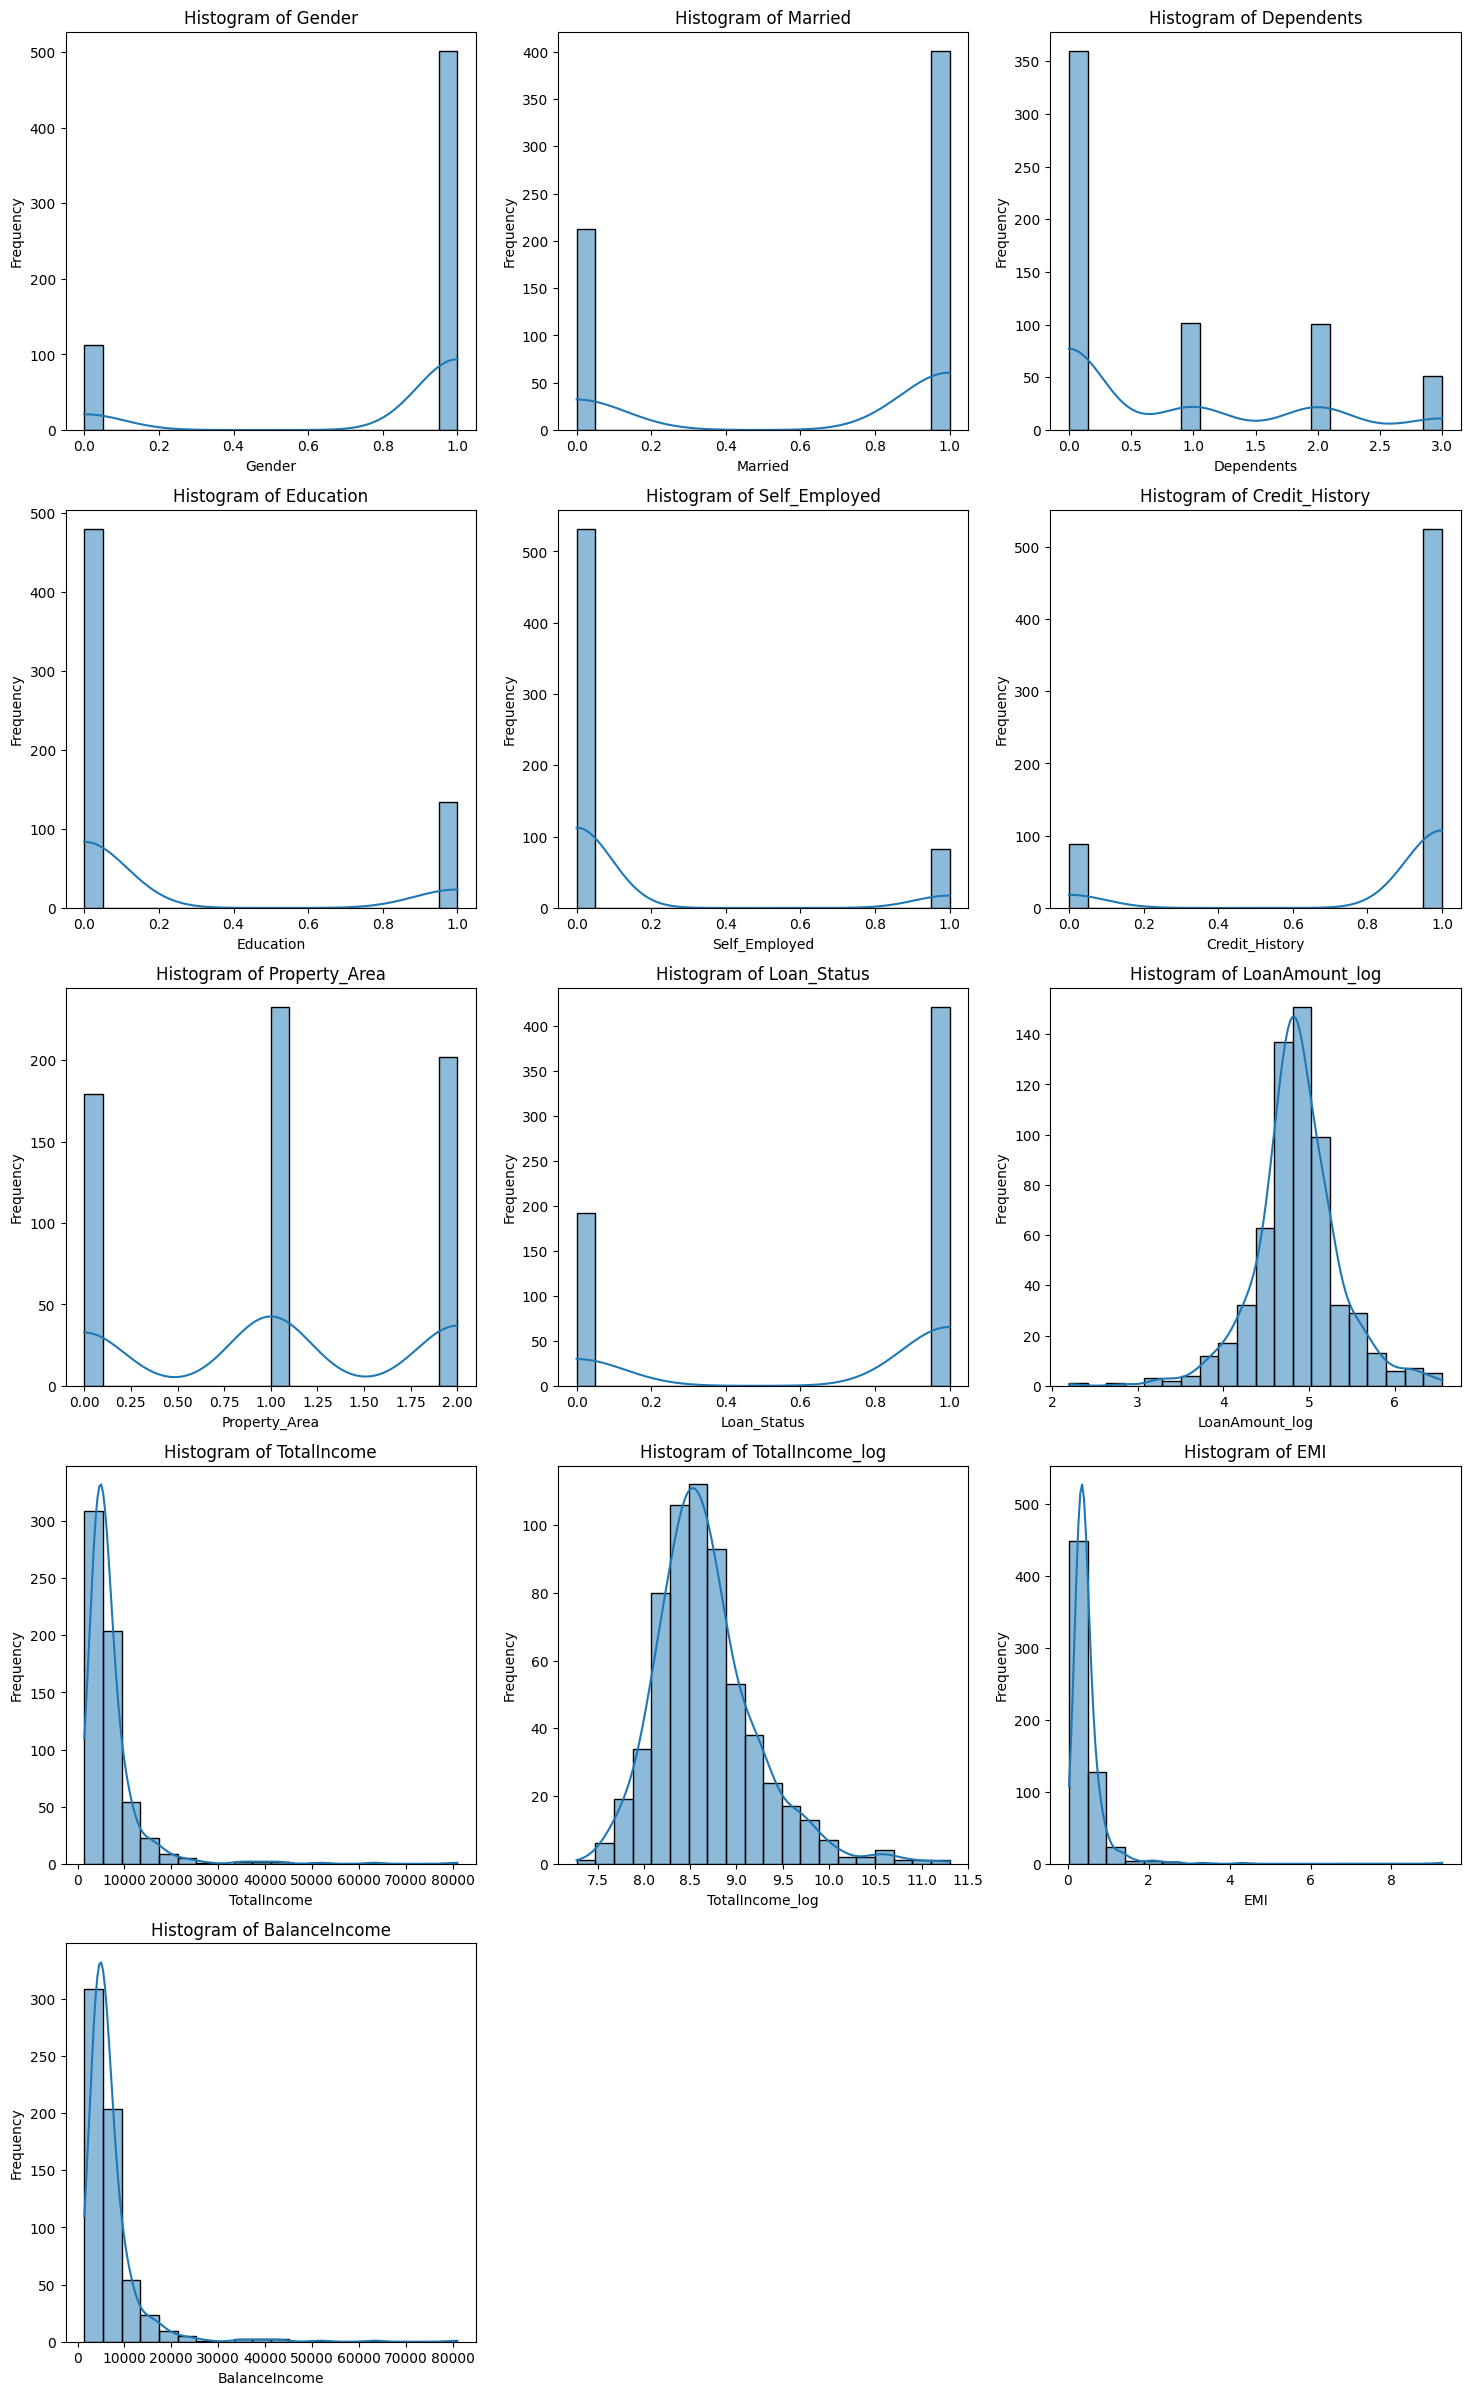

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

num_plots = len(numerical_cols) + len(categorical_cols)
cols_per_row = 3
rows = (num_plots // cols_per_row) + (num_plots % cols_per_row > 0)

plt.figure(figsize=(18, rows * 6))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols_per_row, len(numerical_cols) + i + 1)
    sns.barplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.show()

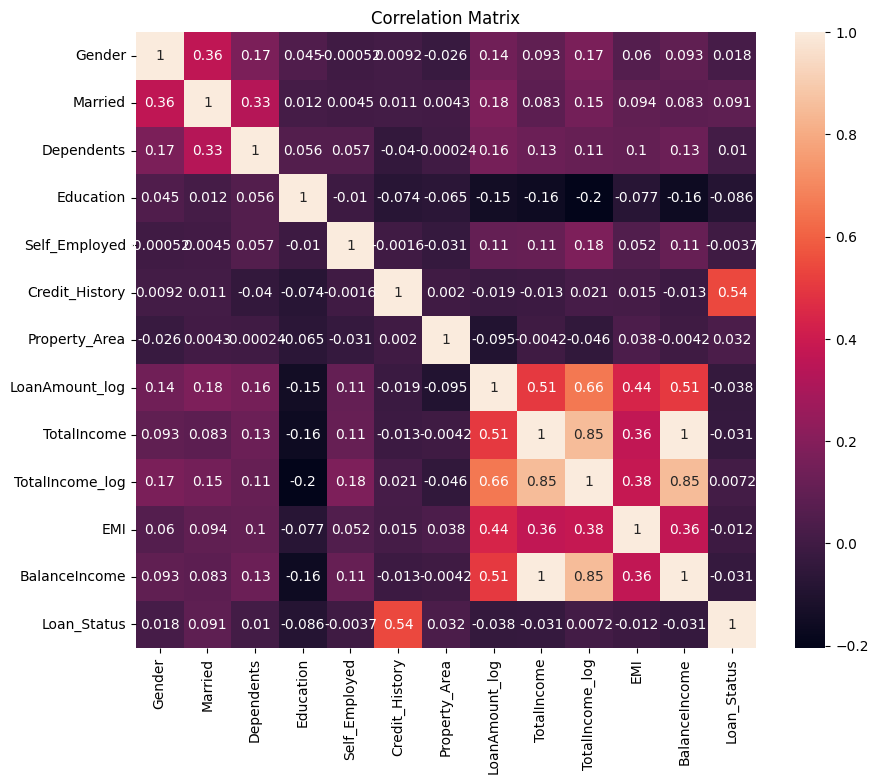

In [ ]:
df['Loan_Status'] = df.pop('Loan_Status')
correl = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True)
plt.title('Correlation Matrix')
plt.show()

##6. Data Preparation for Models

In [ ]:
X = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Logistic Regression vs Decision Trees

In [ ]:
model1 = LogisticRegression(penalty='l2', max_iter=100)
model2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)

In [ ]:
%%time
model1.fit(X_train,y_train)
log_train_pred = model1.predict(X_train)
log_pred = model1.predict(X_test)

CPU times: user 26.4 ms, sys: 1.95 ms, total: 28.4 ms
Wall time: 78.2 ms


In [ ]:
%%time
model2.fit(X_train,y_train)
tree_train_pred = model1.predict(X_train)
tree_pred = model2.predict(X_test)

CPU times: user 15.3 ms, sys: 0 ns, total: 15.3 ms
Wall time: 32.3 ms


###7. Logistic Regression Performance

In [ ]:
log_accuracy = accuracy_score(y_test, log_pred)
log_train_accuracy = accuracy_score(y_train, log_train_pred)
log_cm = confusion_matrix(y_test,log_pred)
log_clf_repo = classification_report(y_test, log_pred)

print("Training Accuracy is: " ,log_train_accuracy)
print("LogReg Accuracy is: " ,log_accuracy)
print("\nClassification Report for LogReg with Tuning\n",log_clf_repo)

Training Accuracy is:  0.8065173116089613
LogReg Accuracy is:  0.7642276422764228

Classification Report for LogReg with Tuning
               precision    recall  f1-score   support

           0       0.89      0.37      0.52        43
           1       0.74      0.97      0.84        80

    accuracy                           0.76       123
   macro avg       0.82      0.67      0.68       123
weighted avg       0.79      0.76      0.73       123



###8. Decision Tree Performance

In [ ]:
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_train_accuracy = accuracy_score(y_train, tree_train_pred)
tree_cm = confusion_matrix(y_test,tree_pred)
tree_clf_repo = classification_report(y_test, tree_pred)

print("Training Accuracy is: " ,tree_train_accuracy)
print("Tree Accuracy is: " ,tree_accuracy)
print("\nClassification Report for Tree with Tuning\n",tree_clf_repo)

Training Accuracy is:  0.8065173116089613
Tree Accuracy is:  0.7723577235772358

Classification Report for Tree with Tuning
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



###Comparison with Confusion Matrices

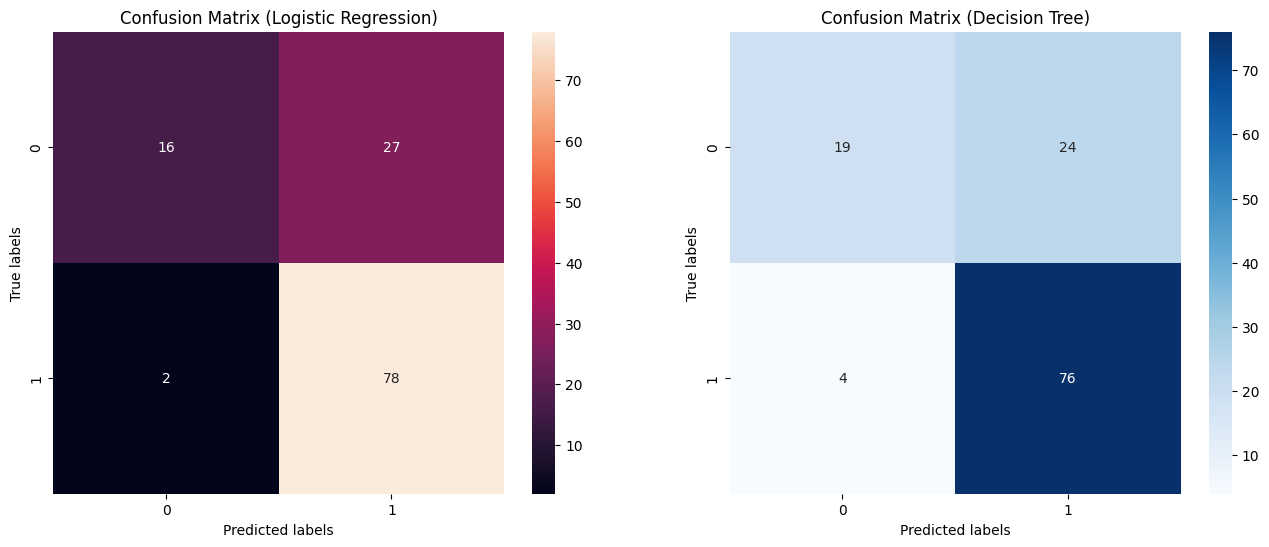

In [ ]:
plt.figure(figsize=(16, 6))

# Plot confusion matrix for Logistic Regression
plt.subplot(1, 2, 1)
sns.heatmap(log_cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Logistic Regression)')

# Plot confusion matrix for Decision Tree
plt.subplot(1, 2, 2)
sns.heatmap(tree_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Decision Tree)')

plt.show()

##9. Findings and Conclusion
1. Decision Trees generally have faster training times compared to Logistic Regression.
    
2. Logistic Regression performs better than Decision Trees in terms of accuracy without any hyperparameter tuning.

3. Decision Tree's (without tuning) classification report showed slightly lower precision, recall, and F1 scores compared to Logistic Regression, which showed a balanced performance for all these metrics.

4. Decision Trees can significantly improve performance with proper hyperparameter tuning, such as adjusting the maximum depth, minimum samples per split.
    
5. Logistic Regression typically does not show as much performance improvement with tuning.

6. After analysing Confustion Matrix both models demonstrated good performance in predicting the majority class but struggled with the minority class, indicating a potential class imbalance issue.

7. Combining ApplicantIncome and CoapplicantIncome into TotalIncome and then creating features like EMI and BalanceIncome showed better correlations with Loan_Status.

###Improvements
8. Implementing techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or class weight adjustments could  resolve imbalancing and further enhance model performance.

9. Exploring more sophisticated models such as ensemble methods (e.g., Random Forest, Gradient Boosting) can lead to better performance.
    
10. Performing cross-validation to ensure the optimal tuning of the model for performance and avoid overfitting.